# Practical Deep Learning Workshop 2021
## Assignment 2 - Time Series
 
### Authors:
 
1.   Naor Kolet 205533060
2.   Chen Doytshman 205644941

# 0. Imports

In [1]:
import pandas as pd
import numpy as np
 
# TensorFlow
from tensorflow.keras.layers import Dense, Conv2D, Dropout, MaxPool2D, Flatten
from tensorflow.keras.layers import Input, BatchNormalization, Concatenate
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.utils import to_categorical

# Scikit-learn
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import StratifiedKFold

 
# Plots
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Misc.
import pickle
import os
import random
import joblib
from tqdm import tqdm

SEED = 42
%matplotlib inline

In [2]:
os.chdir('PAMAP2_Dataset')

# 1. Exploratory Data Analysis (EDA)

### a. General exploratory of the data

## 1.1 Dataset Description

## 1.2 Data Load

First we will load the data to a dictionary.

In [3]:
dat_files = [_ for _ in os.listdir('./Protocol') if _.endswith(".dat")]
columns = ['timestamp', 'activityID', 'heart_rate']
columns += [f'IMU_hand{i}' for i in range(1,18)]
columns += [f'IMU_chest{i}' for i in range(1,18)]
columns += [f'IMU_ankle{i}' for i in range(1,18)]
subjects = {subject.split('.')[0][-3:]: pd.read_csv(f'Protocol/{subject}', sep=' ', names=columns) for subject in dat_files}

In [4]:
id2activity = {
    1: 'lying',
    2: 'sitting',
    3: 'standing',
    4: 'walking',
    5: 'running',
    6: 'cycling',
    7: 'Nordic walking',
    9: 'watching TV',
    10: 'computer work',
    11: 'car driving',
    12: 'ascending stairs',
    13: 'descending stairs',
    16: 'vacuum cleaning',
    17: 'ironing',
    18: 'folding laundry',
    19: 'house cleaning',
    20: 'playing soccer',
    24: 'rope jumping',
    0: 'in transition'
}

## 1.3 Preprocessing

According to the dataset documentation, some missing values (NaNs) are present due to wireless communication dropping or due to problems with hardware setup. We will perform data imputation to fill those missing values.

In [5]:
def impute(subjects):
    return {subject : df.interpolate(method='linear').bfill() for subject, df in subjects.items()}

subjects = impute(subjects)

### 1.4 Data size, structure, samples, etc.

In [6]:
print(f'We have {len(subjects)} subjects in our dataset.')
print(f'Each subject is being measured by {list(subjects.values())[0].shape[1]} metrics.')
print()
print('Number of samples varies across subjects as follows:')
print('----------------------------------------------------')
_ = [print(f'Subject {subject} has {df.shape[0]} samples') for subject, df in subjects.items()]

We have 9 subjects in our dataset.
Each subject is being measured by 54 metrics.

Number of samples varies across subjects as follows:
----------------------------------------------------
Subject 101 has 376417 samples
Subject 102 has 447000 samples
Subject 103 has 252833 samples
Subject 104 has 329576 samples
Subject 105 has 374783 samples
Subject 106 has 361817 samples
Subject 107 has 313599 samples
Subject 108 has 408031 samples
Subject 109 has 8477 samples


One intersting feature of this dataset is heart rate. Let's see how it varies depending on the activity.

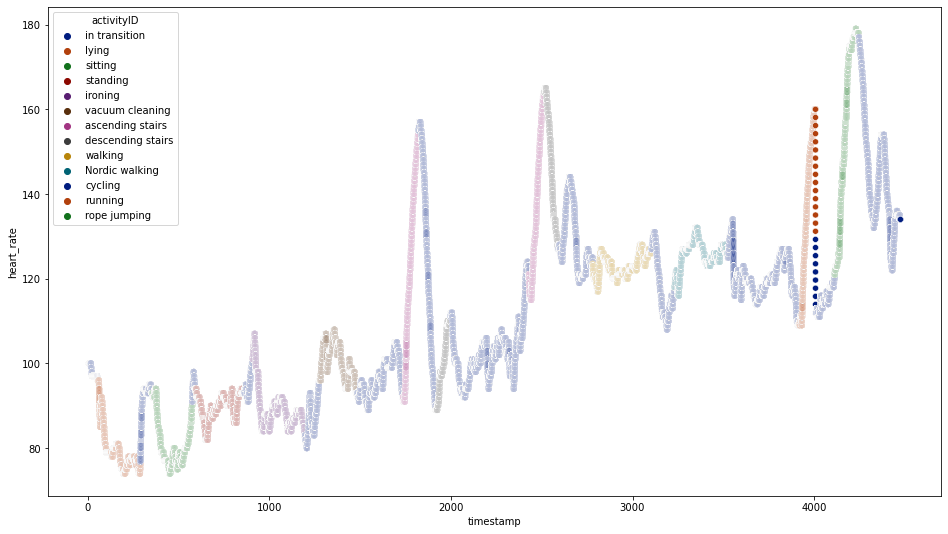

In [7]:
fig, ax = plt.subplots(figsize=(16,9))
sns.scatterplot(ax=ax, 
                data=subjects['102'],
                x='timestamp', 
                y='heart_rate', 
                hue=subjects['102']['activityID'].map(id2activity), 
                palette='dark')
plt.show()

TODO: 